# Exercise 4 [Cart-Pole Model]

In [17]:
# a few packages we need to import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython

# Problem
We are interested in computing a linear optimal control law to stabilize the cart pole system when subjected to small
deviations from the rest position (when $x=0$, $v=0$, $\theta = \pi$ and $\omega = 0$)

<img src="cart_pole.png" alt="drawing" width="400"/>

The dynamic equations of the Cart-Pole model are written as
$$\begin{eqnarray} \dot{x} &=& v \\ 
\dot{v} &=& \frac{f + m_p \sin\theta (l \omega^2 + g \cos \theta)}{m_c + m_p \sin^2 \theta} \\
\dot{\theta} &=& \omega \\
\dot{\omega} &=& \frac{-f\cos\theta -m_p l \omega^2 \cos\theta\sin\theta - (m_c + m_p)g \sin\theta}{l(m_c + m_p \sin^2 \theta)}
\end{eqnarray}$$

which we discretize using a time step $\Delta t$
$$ \begin{eqnarray} 
x_{n+1} &=& x_n + \Delta t\cdot v_n \\ 
v_{n+1} &=& v_n + \Delta t \cdot \left( \frac{f_n + m_p \sin\theta_n (l \omega_n^2 + g \cos \theta_n)}{m_c + m_p \sin^2 \theta_n} \right)\\
\theta_{n+1} &=& \theta_n + \Delta t \cdot \omega_n \\
\omega_{n+1} &=& \omega_n + \Delta t \cdot \left( \frac{-f_n\cos\theta_n -m_p l \omega_n^2 \cos\theta_n\sin\theta_n - (m_c + m_p)g \sin\theta_n}{l(m_c + m_p \sin^2 \theta_n)}\right)
\end{eqnarray}$$

This is the equations we use to simulate the dynamics of the system below

## Simulation of the Cart-Pole model and display functions

In [18]:
def simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81):
    """
    This function integrates the cart-pole system (the nonlinear system) for horizon_length steps
    
    Arguments:
    x0: numpy vector, initial value for the system (4 numbers for x,v,theta,omega)
    K: a list of control gains (of length horizon_length)
    uff: a list of feedforward control inputs such that the control will be f[i]=K[i] * x[i] + uff[i]
    horizon_length: lenght of the horizon to integrate
    
    Returns:
    x a numpy array containing the integration result
    u a numpy array containing the control at each step
    """
    delta_t = 0.01
        
    x=np.empty([4, horizon_length+1])
    x[:,0] = x0
    
    u=np.empty([horizon_length])

    for i in range(horizon_length):
        u[i] = K[i].dot(x[:,i]) + uff[i]
        dx = np.array([x[1,i],
                      (u[i] + mp*np.sin(x[2,i])*(l*(x[3,i]**2) + g * np.cos(x[2,i])))/(mc+mp*np.sin(x[2,i])**2),
                      x[3,i],
                      (-u[i]*np.cos(x[2,i])-mp*l*(x[3,i]**2)*np.cos(x[2,i])*np.sin(x[2,i])-(mp+mc)*g*np.sin([x[2,i]]))/(l*(mc+mp*np.sin(x[2,i])**2))
                       ])
        x[:,i+1] = x[:,i] + delta_t * dx
    return x, u

In [19]:
def animate_cart_pole(x):
    """
    This function makes an animation showing the behavior of the cart-pole
    takes as input the result of a simulation
    """
    
    #subsample
    plotx = x[:,0::5]
    
    fig = matplotlib.figure.Figure(figsize=[6,2.3])
    matplotlib.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-3,3], ylim=[-1.,1.3])
    ax.grid()
    
    list_of_lines = []
    
    #create the cart pole
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    line, = ax.plot([], [], 'k', lw=2)
    list_of_lines.append(line)
    
    cart_length = 0.5
    cart_height = 0.25
    
    def animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])
        
        x_back = plotx[0,i] - cart_length
        x_front = plotx[0,i] + cart_length
        y_up = cart_height
        y_down = 0.
        x_pend = plotx[0,i] + np.sin(plotx[2,i])
        y_pend = cart_height - np.cos(plotx[2,i])
        
        list_of_lines[0].set_data([x_back, x_front], [y_down, y_down])
        list_of_lines[1].set_data([x_front, x_front], [y_down, y_up])
        list_of_lines[2].set_data([x_back, x_front], [y_up, y_up])
        list_of_lines[3].set_data([x_back, x_back], [y_down, y_up])
        list_of_lines[4].set_data([plotx[0,i], x_pend], [cart_height, y_pend])
        
        return list_of_lines
    
    def init():
        return animate(0)


    ani = animation.FuncAnimation(fig, animate, np.arange(0, len(plotx[0,:])),
        interval=50, blit=True, init_func=init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

## Example simulation
Example of a simulation of the cart-pole without any control input
here we set the control gains to be 0 and uff to be 0 as well

<IPython.core.display.Javascript object>


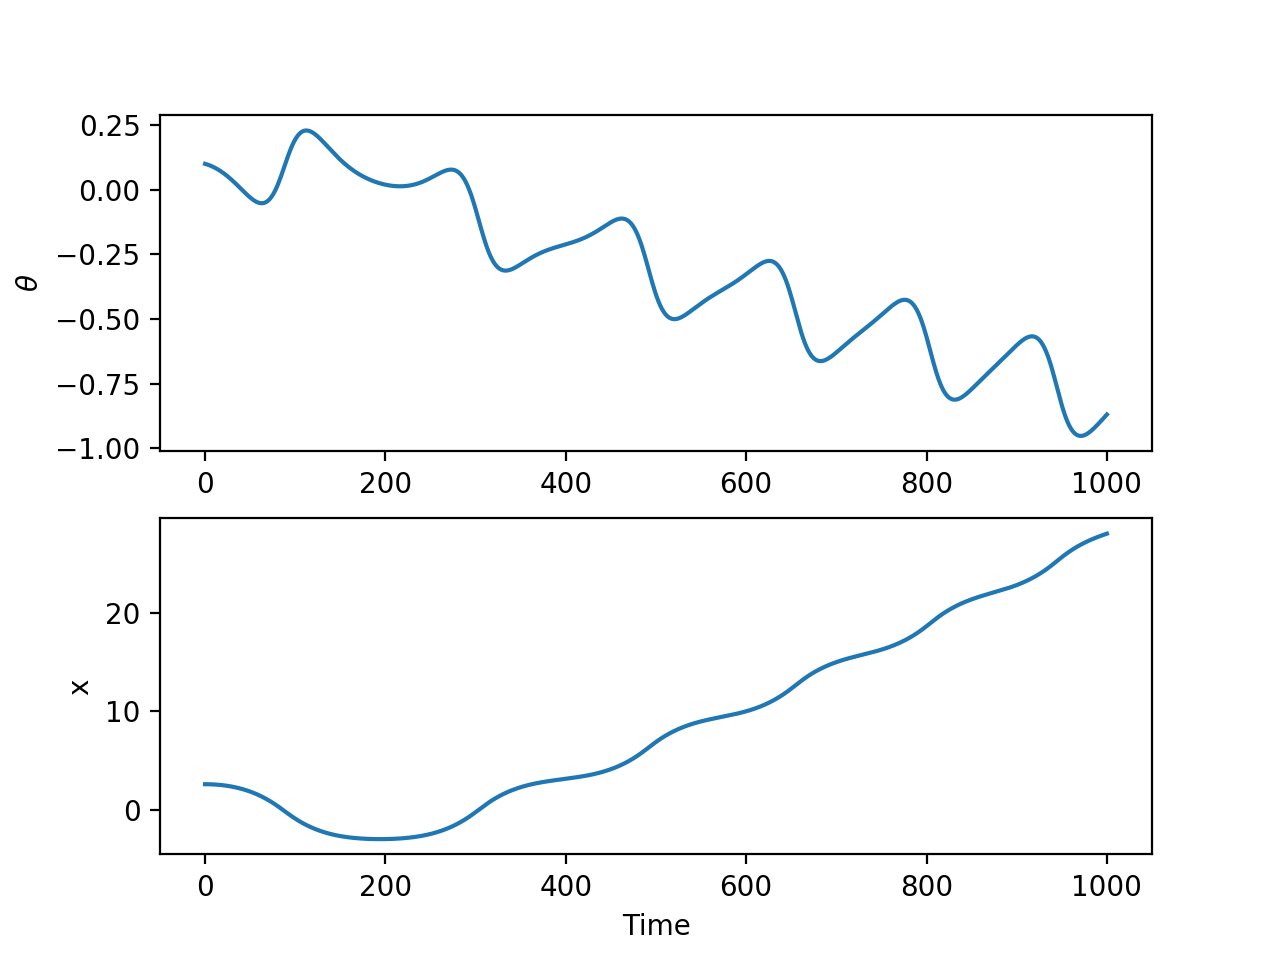

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADBZm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAv8ZYiE
ADv//vdOvwKbRZdqA5JXCvbKpCZZuVJrAfKmAAADAAADAAADAtr0eKCHw9Nt/MBDWD+/sM+OkJo2
5XPXr4JdXQwTgxWTZ482wNKaLACXPz3AHMPiS+Cyw5SjDpyHlVfRJU+imQW/9Cdo4LILxlvcA9ZX
zsbPlaSD08zFBQ+6bA4REaNyfMRPFim40IJL5TlEMjhLiITgapYPPDyZpMekv3yx2BItZiUhiT/s
ujCb86KFyvrzR/pdYLxGuC88IewlxgoYAUp2WOfOE9PurgZYthAqrpZ6uZU4gDP59ZELfUlbxqSo
QlTBTuuY5ZOdLXhopWf7u2wD14FbxFCZkhkiGCPD2OCr2bnXEQh0d2YuTpyUAB5hoJ5zfgFS9Jn0
Sc7FLjxe0EuczRW4bYj74Wui97GcGm4pPPlGAnS/SBcEe2uXn7Mv/h5CWO4n8MCEORR10iEaZTzQ
cSv+qUNwJAACZkk5wXwE5Du7LOQvYAKmwZPm6x2oZNgQ19wrW+ZeXXiolM8UzbXxzLGoLSPM/umF
qbdQzEnyqMLWW7y1L1IYtUMk0iTfVJGSUv80pV6lq3EMd/1N25FR0Y5zWU2cCBrKMcSf1UJrCTGC
I1Did5X/MSUgPjAOfbBAt7HbvpnfzG+2VMM2Qd2j+EFdOq+B+pJjiwGA2hFRqMhaW5Cn9CqvBeuo
VlNtFh/OwWaBf2p48V7gq1Z59fK2H1l5JTOKXJmTWFK3vm4TqSyVuZE7dSI2BYTsRsvzG23s3z/o
yPh+GV6Aq0VjtuTvLdJChH2zKOWdEGnHgdEdAmShR8HUmnL6lRRGyBK/AMNBO+TytnjCVUJfBJ8J
RrwLLSjvPkKmvQWUdUq2QQSBQ0RDgAEjfxIPhBxiz6KxEgP5hkTcea7TOTo+2xVDWYngoDQhao+L
L/2FHKJdqGs5wps+HcuU6y69UZUrg3nWjeabo2O0vWBOeDG7iFzHZkDc/QCx3KX0VZPF50fffFTQ
yhZ/zJAomtL7DerD/OzCrISDWUVDzS+U12jQEt3Ydtu3olZ8Jh1c/XAcS5DA8M5+8q+2lCQrNpmm
L3LznO+uBaew2NVXSb68Bw1xQ/irndnCPzweFIN5nGD9I978EyEto6v8z9CR8wJSDkEWyd9922lI
ZNNz2nRaK1FbflJad1zzWVRw8y6jVZMxJIZ9bMz9beXVnDdK+P/jpuchaz8wl5kFe5g1SNLBP3Wn
ZUqvhQRL0y60JEOQUVADiJt9Yt/itVEeSUwtZYDLYn+bgIV7P9CQADM8QhXwxwdYem0Xbm9mIyGj
mSAdfI5S8p/KIfaK592mfdov+5stD4Vq5tW7ikjct/ZuGxvqU/vtgfOr5BN3e4mXW+DBIupd9CQi
w3BHYu8wUzjdOTH2ESh5IasVMJqb0bhQd/H9r+5708b4A6U3AQip/EbQAAXrZv9/YvO0VXPR776z
yAUVf1FHsXFLyHwERurd5WNgqKkz4wVW3H2bDJZmwLhP+BB18Jgi+A/xQHmox+DpxbEuWjlm7QPc
vQLZll0JxquGg3TbzWvCAhoN9OExTaNr+d4fWpWTDNknckpSF30OOR/Y1NilnjOFmy1mHbEFoLC1
JR0/qJw/Hj+pO2dYhiLgldkTmkW1Y7HtmQF10a7V6p4e5x03uBx4bB4+nmf3RI55yfLvvwPn20FP
xiQNsotZwNNaf6ilaV+RF+JTtVOWlKx5nm0XABQ9Qz1kJmODFWn9TOeGIFepVwJShsuTyzfrEV9i
PyD5ZbgqffBWACqbdpwKEBby1bLLbziG5s0/QkQAgTDFZQCyOyVygxF28OnJo/VVChdskqom+tGF
BO8GRHwnaGlCGZ6M87lMGhtN/Bfome67wczkeS+/tH/JDY6jX+kTaHX37d0NOdch8tE5Ul/H6zry
dQogapsAkNSyvyPKCBjEGislKqhYyaIdbZMYR2MvMazo71nxHnjuCsa1ELIzKC2gysGITjO8VdFO
mROKXhMZ+7XAAP1jRQ8qtWaXCMi2r5nExHHilB6QSn3Q7DBJNAY1s1+G/mJFFE1Fiz2GItT+rdvr
gAHLiVylsFnlsOiNz0UZG1MFOY7ytgBVadx9pnb48rfPaK1d6+dACGAiFSl9yIFEyJf5wwQmjbs4
2LHSWWPYi23VsYGkSHUqSi8KqBclvqz52A9YYj5AADInuVk8wVvG+Gm54LaAMIcvvK+MOtVYNH1b
bN7gfQ1gzoCoB1mEYXZ1KpjzhWKr+toFQjwk8/jDel8xokocIALuRD2ONa/RVCTCrdxE5hfPRFlz
cEkbQ8egmK5XVCptF5gH24UMUW6bZi5frAXR35ZvBOpgeiIK+3dCISdzcrWfMA3QNU2C1NUOjCu9
d46ROc/HQoP/MR22kUP74UL3zShIYaHxzkXlNDXWeg5GPKmRdgTBengPiwd6e8xYslU12xF8jqlI
xVYzbJnl0udY7ner7EJAhszJVB7iFjO4ZmSfQBlKzQg/s3hKt+fsXBo3YhnK/qCCc/xYUT+4O05V
EERaLox9aP3Rs2OTPkn8HVvyAve/7iYuMTQG2+oYYeD7joit6rECJRaWrnCirncplsXDYeUAhhDX
htYnYUqBEMP2fV232cWOZ/WttLDfoLCCeYx0uKrBCuZHbjnlxXlggzi9Z2Np8kJ/gk/ULzJo9DOw
fzKhcNeDk1hs+vLvcnxDePQhFDu1edgAAepukt4MWwDLUtqOIm04O0n+0/f6QK2t84qtSmENVBnO
QhgONmviHr1fJ/Laks/bp5PbnUAr3uZjfskLQ02sZnvYzBhfBOUTfnS0VZNm3sOCYtRuTh+kXZNV
wrkRpfaNt0uBS3aI5/H/b+knSmQ/l9g4XlCGi4KCjytUr7uHRWKHRFz86qaoYd2TF66wbchgvYA5
PXPUWPZJ8vHYrE4VVgsNx

In [20]:
horizon_length = 1000 #this will simulate 10 seconds (since deltat = 0.01)

# here we set gains to 0
K = [np.array([0,0.,0,0])]
K = K*horizon_length
uff = [0.]
uff = uff*horizon_length

# initial conditions
x0 = np.array([0.1,-0.1,np.pi-0.5,0.])


mp=1.
mc=5.
l=1.
g=9.81
x,u = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)

# plot x and theta as a function of time
plt.figure()
plt.subplot(2,1,1)
plt.plot(x[0,:])
plt.ylabel(r'$\theta$')
plt.subplot(2,1,2)
plt.plot(x[2,:])
plt.ylabel('x')
plt.xlabel('Time')

# make an animation of the cart-pole
animate_cart_pole(x)

# Question 1
Linearize the discretized equations of the Cart-Pole Model around the resting position $\bar{x}=0$, $\bar{v}=0$, $\bar{\theta}=\pi$ and $\bar{\omega}=0$, $\bar{f}=0$ and write the dynamic equations in the form 

$$ \begin{bmatrix} \tilde{x}_{n+1} \\ \tilde{v}_{n+1} \\ \tilde{\theta}_{n+1} \\ \tilde{\omega}_{n+1} \end{bmatrix} = A \begin{bmatrix} \tilde{x}_{n} \\ \tilde{v}_{n} \\ \tilde{\theta}_{n} \\ \tilde{\omega}_{n} \end{bmatrix} + B \tilde{f}_n$$

where $A$ and $B$ are matrices of appropriate size and $\tilde{x}_n = x_n - \bar{x}$, $\tilde{v}_n = v_n - \bar{v}$, $\tilde{\theta}_n = \theta_n - \bar{\theta}$, $\tilde{\omega}_n = \omega_n - \bar{\omega}$ and $\tilde{f}_n = f_n - \bar{f}$. Remember that the resting position is a fixed point, i.e.

$$ \begin{bmatrix} \bar{x} \\ \bar{v} \\ \bar{\theta} \\ \bar{\omega} \end{bmatrix} = f(\bar{x}, \bar{v}, \bar{\theta}, \bar{\omega},  \bar{f})$$
where $f$ is the discretized dynamic equation of the Cart-Pole Model

# Question 2
We would like to use the linearized equation to compute an optimal controller that stabilizes the system around the resting position. 
1. Write a cost function that will help stabilize the resting position (be precise with the variables you use).
2. How would you (approximately) solve this optimal control problem?
3. What will be the form of the optimal controller $f_n$ (remember that the linearized system will give you $\tilde{f}_n$)?

# Question 3
1. Write a function (e.g. take example from Exercise 3) that computes the optimal control for the linearized problem. 2. Simulate the dynamics of the Cart-Pole Model with the computed controller for initial conditions $x=0.2$, $v=0.1$, $\theta=\pi-0.2$ and $\omega=0$. What happens? (show a plot of the states of the system and the cart-pole animation)
3. How can you change the response of the  system (how fast it stabilizes)? Give an example with a simulation.
4. Does the controller still work when $x=0.2$, $v=0.1$, $\theta=0.2$ and $\omega=0$? Why? (show a plot of the states of the system and the cart-pole animation, use a smaller horizon if necessary)

In [21]:
def check_controllability(A,B):
    """
    This function check  the controllabilitystate for system
    c=[B AB A^2B A^3B]
    """
    c=np.concatenate([B, np.dot(A, B), np.dot(A, A).dot(B),np.dot(A, A.dot(A)).dot(B)], axis=1)
    R=np.linalg.matrix_rank(c)
    print('rank is',R)
    if R< np.linalg.matrix_rank(A):
        print('is not controllable')
    else:print('is controllable')

def solve_ricatti_equations(A,B,Q,R,horizon_length):
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun
    
    Arguments:
    A, B, Q, R: numpy arrays defining the problem
    horizon_length: length of the horizon
    
    Returns:
    P: list of numpy arrays containing Pn from N to 0
    K: list of numpy arrays containing Kn from N-1 to 0
    """
    P = [] #will contain the list of Ps from N to 0
    K = [] #will contain the list of Ks from N-1 to 0
    
    n=horizon_length
    current_p=Q
    P.append(current_p)
    while n>0:
        # print(n)
        C=np.dot(B.T, current_p).dot(B)
        D=np.dot(B.T,current_p).dot(A)
        current_K=-1*np.linalg.inv(R+C).dot(D)
        K.append(current_K)
        current_p=Q+np.dot(A.T,current_p).dot(A)+np.dot(np.dot(np.dot(A.T,current_p),B),current_K)
        P.append(current_p)
        n=n-1

    return P[::-1], K[::-1]

rank is 4
is controllable


<IPython.core.display.Javascript object>


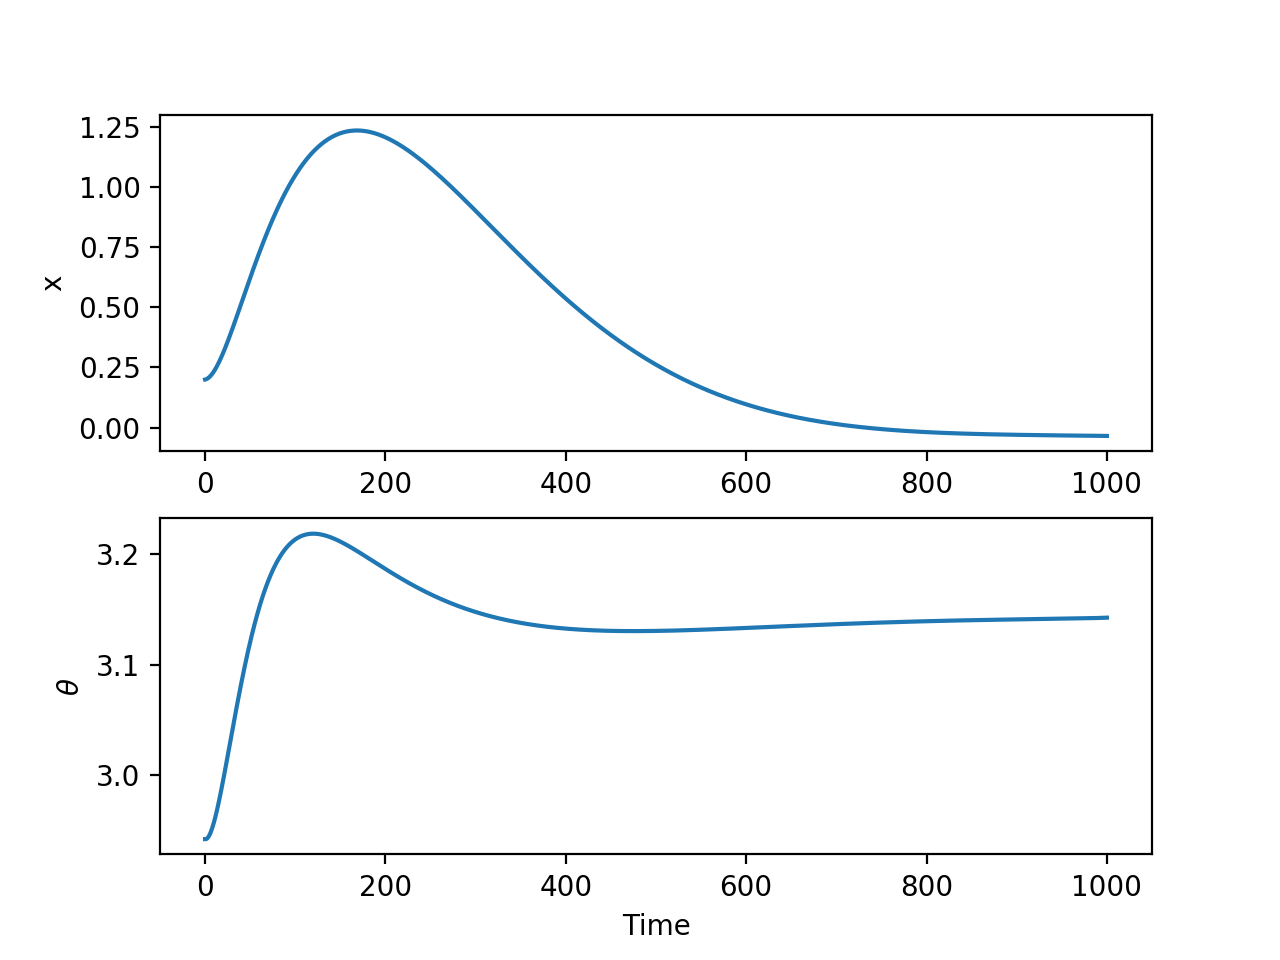

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABSwm1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAvhZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAADAAAI0IvBoZ8PTbfzAZh90yKLsHK9k1F1
UFi8/dEAHh4AJJVsXbYGybJ9vqPNHkraKV3cGqOMtZNfXmX7eQF+Zf5L5v9wnBmejHNZbiSHWU1A
E9NNAfS34VeQI3tn9MEaQOTow69yEritgT0Af2pik7Ym/76fYYXxKa/8cfwdA8cZw1xyehM0WFjZ
beEpWiaFwHiIs5wea57hP4qWWLwpwnpDKOSjAO6EJELlaM7gA584T0+XECLQGBFVdLPVzKnDox9m
jHwt9SVvGpKT/cd7NI3HPTfUG/DcfhKgtAG+uCR8cdf88V1adGQ9GjRoESsDgp0Yej+I1ihMN8v+
NXFhJJ1N0UuOqrieSo/2gjmGMUxZWM/zLYhPBkBxKtugl3Og6p4Q2pg8e0nNZqxntw07IT8aV0jD
ls+fjyKd0hfgX7xifldQDU8xU0HnubSvUtwQlDsBGfHF6edNY+Ox23/gwA+/GP2jD1sz8JzcVcAH
W/WeQYd5pb246tOPJVK/McbTj5ac5iQSjYosi6O/n55YujHZ/V90nufKtm3cELu5HHakoXaQj09Y
byKAcEvwoUAkR3hIuG+QkH7PylxaDAOfbBBH7H14plLF0pP5yc8b7R/CCunVfXrxoub+g/mEDFP9
Vl2rAmSyBRfjhzgsG3HRqY1KaVRQwRVFUvNjy3gB2Eoo3119ZF/e1PpIemV9PTVNV1UNplfXKfhq
0Pa//vguV2mQ2bo/NBmWxPDvppjeRstnK/1K4jnEMDcbdDBlatmEBGr/cqsvxi9+YcTMAAEks0DN
nCWMaP0yQSHcmleP+IO4JUmC7U8IvUtWNwyJErUh7a6LBtGya2G9Lw6Nnfa0LSPsBAnYMAoCdQ3Z
BJKl9fhAuOhPtcqqN8RQKccf88abOctqCsVk06tsklqMCNvuP7EHGRebGLFOuV4LBCz/pI4u8e3F
f4slyAH56jloo253xgcm7PN6t1M3c2LADsZ6a6ui6Qkt08r4lW4l6wi+Ya8Ee7cj4R4HgD1sDi3M
X36iTvkAWNyfpLXOLh730eiKgcZ4P/bJxHXtT3NrxmY7gr33nZbdF+DgS/2Izj2MKUrwY3FxX/aX
tjPB756kqjjnCOKKtOJpLVzVyjCudNLEuKYsyVcLMLCcL3fd6hO5EM3wuwe8TD4iX928J7iMfJMK
5L0KrJwSNE+RQp9zv9/4n8w73Hff5uTtyjjvkm3uEtVcNrExsrWCvXFPFWiUEgbx/MZJgRd+Vtuw
n4lOpnSmdZUoqj31L2jruIMTMZ177w+lNarXVVKRUuIy62OYY3YtLvmy+1gccx+AF/dtj7QtJyiU
8OXB1OTVWzWOCv0El7EqkXtGnqgQjnjLKDV+SZpFnso82wZ0MJiTm0gqdGiANwYY+9xHUwtzvzUs
gyvE3BtKOcCuoWjuO4wcCaWxrdxwHFxfA+JLhV3VlA5Vh+xSUiusgW6PJNajqjdUxBjBZ6DRe5O9
wz0s4GVMNIVrJu7ftrga7/ZzCeFxoAbmhavm8qH01RqAhCFyRjgEdWhO4TS7ci8FTpmxu0/Rc7lU
tC/lTiGE0/5qzVWuI7Ot+lX23Ts+DauecLLHg8N2RKFhUpQxDlSL/nio0mSxZVf+HdffBzHmTLMo
DYLN16elo/zU+h3M7m/q0/n1zwxBHy012tLbecQsTfrEV9iPuDFKf3aBGZOeKN3Vm9Dg/SS6M0qe
v8DkuWvehQo3X7R4PMBEGwaWUmlyImH+fd9lAnhJjR8Z3iXg/QG44M20ECMsAgS+klIdtYu3Yi+B
xxFR/tQPz8ou1tCXDMU//Yp67CRFzsXDjsH8CI0yXVKx7pmN0O8nlQb66yCXBVCG2aEIOjMODSRt
qO9J7AhbtH7PVXKgTrtvCaZ3AbKFme8EvWq+JLt4bF4Y6HjT10jTZaW3kMoAMalHJOUL8CryyWzD
+lkt13dxDVUvHc0qbLWTI3bDYB/GF18ZDUNzW7iXipFBcdRg0Zyn4tBusfnooyNm2+NpyYpgAgSP
GQyBKGnbbuIbLSZMQPhHpch6mGFpJzkQlmBWl7P9veTnd5Xbvbu9kK9JMge5J7XdqVsbye8ktUb7
o7M3DL/L4zjIHPuhPtlDDY56p5vyX7wD/LpzNbpUoGowu+Oalkb7E0NpErymxwJM7rMjrab4KSRg
1efuVIi80hnWAPihqE0m5AAblqPuFck6Zyx7Q2peMJ5H4K90v5SkXwVEOLUdPOO9YTJtLkxoyCTX
hK/pzbu3R6m9eOYIzw06Q8p7ZlPmaC5X4Q2x/gHclkjSutdhcVvOFHSn33/bW5Z1lYjWIeHFKLsv
Xgt2cKloxbZWQJOdAd3aWHmQdK+ht7uVaJOvTnt0aafaYwneIti8Es2/Ra0c1M3O9X2ISBC8SyH3
vwoFN22Ydxz4QEWUuwWzcQgKSlYS7kk6NqVewgg4DpnGca5IUGpFLNKJ8xIo6pQkly/JgjGvAR8W
ck1nywIUbrhz7wmHVkJ392ywvny/K4+VQfkHsJi4HeBhqWH4jYjVLD86XT22EI5j/XOqSZ8R7Bs3
E+FoFW14rPT2I0hnqo/nnowJDgMEGcXrOxtPv+MWZLVj+Yvmh6JIbDOIe06/+daUUIxqPyFu4JiV
aEcgIZWYY7oLCuX1qZ/eAo9Njq9ECkCJtc9n7Uj9QZk8sAtf4Kqae8Si7GSJ4jDXom1ryIKB46Ft
ERXaoFhStV2UWUqKdp/Czx0QZUaKdPNDJjAuyXD8OJd/zsFk2bew4Jl/GJoHOt1XmITK3pfaNt0u
BjqSupnH/b+knSu3KkIeiKVCGi4PKC/QX/m/GLWKH/wbA0xhQsKnkTnr5mtgwXsAcjklLjxsk+Xj
sVibKS6qG4juQVx+KfUGV

In [25]:
mp=1.
mc=5.
l=1.
g=9.81
delta_t=0.01
horizon_length=1000

x0 = np.array([0.2, 0.1, np.pi-0.2, 0.])
A=np.array([[1.,delta_t,0.,0.],[0.,1.,delta_t*mp*g/mc,0.],[0.,0.,1.,delta_t],[0.,0.,delta_t*(mc+mp)*g/(mc*l),1]])
B=np.array([[0.],[delta_t/mc],[0.],[delta_t/mc*l]])
Q=np.eye(4)
R=0.1*np.eye(1)
check_controllability(A,B)

P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)

# here we need to add the feedfordward command uff computed due to the change of variables
uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X,u = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)

plt.figure()
plt.subplot(2,1,1)
plt.plot(X[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X)

<IPython.core.display.Javascript object>


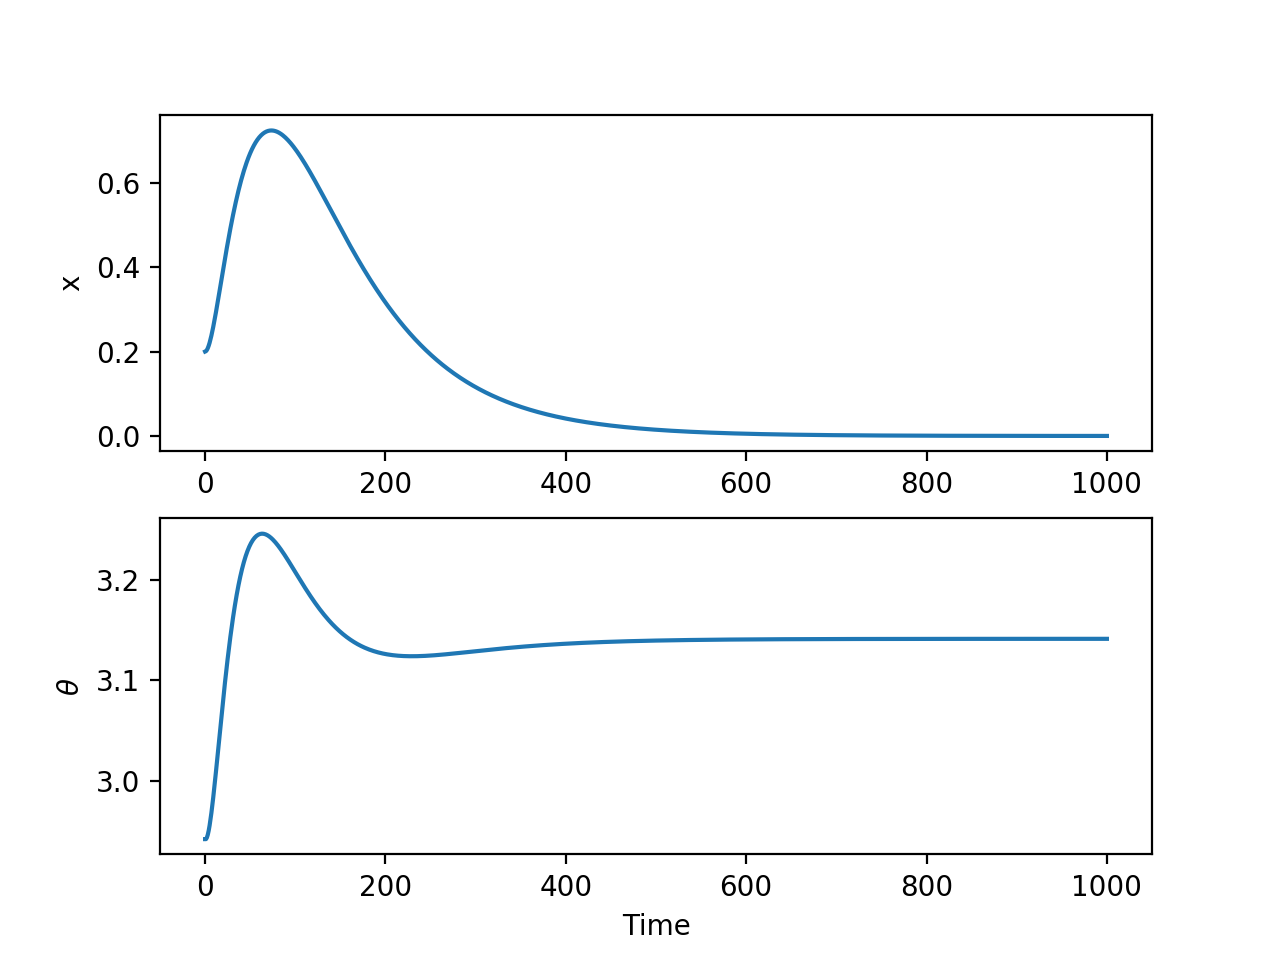

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABAqG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAvMZYiE
ADf//vbw/gU2O5jQlxHN6J0zH78VuLo0N73OAAADAAADAAAI0IvBoZ8PTbfzAZh90yKLsHK9k1F1
UFi8/dEAHh4AJJVsXbYGybJ9vqPNHkraKV3cGqOMtZNfXmX7eQF+Zf5L5v9wnBmejHNZbiSHWU1T
RvOku953z/P9NgcIriJWkWxF5yyxnTjgRnV39tMK+f+O/NSFr8PNpBxFNxAQSXynKG5tgybB541S
wed1gmEAK1xp/QZVIsViUhW7kKjMof89wNKvdWj/S6wXiNcF54Q1hLoxLESoVuoc+cJ6fdS48xbC
BVXSz1cypw9e34gKXdglkAcSn4Hf7z5XbkzV+Mx1iikLF3d0BGkccFJhYju7FT11xxI+dd8egWz4
Z2wwdr5Z3ZXTmjSDA08FylNvYb6r/8Z7kiPQrosptC6ve5OEn38W5GDDBFK3mEUeNAM4v8l/I9hB
VA0RBlLZ8/Hl3IYUyhnGEWKlurOvn6WBLPGM0CoPAy8CTdCKvEUd/2bSoXgY2UyF0bukZ0HpXe/X
Dz3Wh9b9Z5Bh3mlsYjq03RiW2eY42nHy05zHAdraQeW4kWVMxYujQ//EYxjdAa3RYQYw9rRhm1Qq
8mWazhon/bswfsVrKV6FlIuH+ciBSJr1VDThFWMlVp8JyLNzZ70/eQbBot3aP4QV06r7Ml31yXzS
eAsSf/Q98caDy75GDMk1SF7pkPT1D5h9MQG969JPinTBwxpXU9aePeFST6PT1qppADQDQbDWRoXz
Mo0EkWWWZcak08/+aMADDpYTomP/UsoyvR9L3MKnP1KWi/FJcedNL/qUyg81e+805O4NAAVyqqNJ
ugBbwVDqocgIVA8H3JXseba40E1+Il0UkzAtweN4SJ5S8hHbZuE5r6M3wrHGr+qlfNp/DCGuowEh
QNmV6gZMt3//dGj5cBEyf5AYWebZ2hHr81f9xzdSQu+3ulCitsklqLxb350dZUV6+RAwvumerwWC
Fn/SKvaJLcWAHvzGbCPmixZR+en2CE7Z5vaP8LOM2E5KEbEZhkAgF7IUIGFGtKDpcm2qjKBMO9PY
JQKRMg+DuK1w55S97U8K9tHJa5xcfW1ak3J96kFJVEgiwGkdF9MtEyDVP4h7O3OZeisfNlHivmiA
ZGkNoIu4/jWNOT5aMuoXYi6DDAxmuUTANczUXuZlaVDK4HCyq+FBLN842QxUUbWxePmTv6/1fwDC
bB5URo5llxLkjhAsjJ4JM9Gz3+3wflEHBOW7ULqS/lr7q1k1kp73vD5Ub3xy8cD/mU6kYviEmrjX
jTD1HXE/yt4vbXVz2OOSxgN41TCY4CdbBOS4xkHNoJBG+E2LevqosB3hMT2l0gWfVtqPVkrB9vHD
Jbbo42vAAL/44jxQcRONjSK6nGfttOGHhQpxkjgjXDQX6JJn2gmVyLb6S9n+SEaMfebxiWu24uHA
IJcnQcNAZHoTKqGjPJ6Syamn3283VOeqlI3P/HngVNKxke6B33OjMat5APCNZ5kmnH+HSiIFFiIc
1acCszEe0r+/ztZbTc/YiVhxFmnCGAQ/5dxGex8d4pXAHs3rvoRfJTiVQUk+22myz078AEc5UcY7
2mtsVO4rZWpxwf5pxwJ6RFUkAtefnCyXBgDvQmtW3jNB1RseSu0eHv4ypEQkTwvf3eB9syLMGJJY
BCtegpVGawPngRX/S5/UZaE54YgVwZtaYL50MydqSHRFC/vKEm2PBzgMyc8Ubum/6usYZipE/f6n
nSOgZJHydc+q2VX+OumZF4FSkZUWDFYJq4vVu/iSSYkLRCMTl8FcFfqYF+GgJojksbbupckfB5fe
czplFGFnlt7kY9TI7nPXktvqRm/88x8mlNrqn5+RaovCK6gej+UzG/HUqhOIamEfSTSTg2PAfZz3
5093G9S3fDTFpW50e1iQkZFInKUgTPfAytvvJN9JEq1C9u1kfGAAy1/MpGCII4W9AYNSzyUREJq0
RFcVg0cS21wO7Q2xVJZiSL6h8scXU0sHlFvggjSCg9uxIk9kE2+GAiW/OD1BoBJcn3rdwAYA/Tum
gX/Y2U6jlFTG/yE+ykBGYyv/TZwnNyl4KvXjkd0tTcokcwPhIdtw2G2WhvQNrSa1HXjCzwhEjQ9a
VEWy+uGAnyX36RyyPQuMOA7TjJbvqG6IyjdVEixomprJhaa99OQ8busJ6MYZwciLsf7bqcJnIzO7
gwm6OUcfAxp/7sfoCVnfCnDcNmKNRczwGY6iDjOYrScRNY6cEczQeZOPTblE3+fc0zEEdXSSx4hk
Zx5zNjI+N5jqfna8yHJycRTTfTfsB7NY10VV/fbx1A17iDGoaPJR73YMoFzdQNyzpPBZFDwzKcOE
S+NfpbsAivnMNIaMmhKsP7tGSrFKVFevog0/etR3UbMZDUffNvD0wMzMeH3vwoFN24jTxz4QEWUu
wWzZnLtylYS7kk6NqVewdZ4PvnGca5IUANke+nl1Ch3VUoSS5fkrHOYrRVnJNZ8sCFG69v+liDuj
hjdoX+JpBH6Ywbj5VB+QewmLiwQZWXS71gvJp2FKgRDD9nxFGBzSDCzZ9+gsIJ5jHS+h9oj8MBnh
kfNkv2Y4B+bW0l8/lES4HabdR701S9+XihiurWr5qax/vJZaLkMfS6ET5LhV0kAAFOX4CG4t/eob
LD1GX+5Ax+KljBnvUU1t5wcvvTJkhhNitUvIgoHju/I227VAsKVqu0+qjQlit7XGhG/RRop09MUM
YF2TQPFOP0sXGsmzb2HBMWo3Jw/SuL9G4VyI0vtG26XAmmZXUzj/t/STpTI7UvsHC8oQ0XBN/eVq
lfdw6KxRAcK3v4TVDDuyYvV12lXGxi5DlOWAhM87pcc3m16pVWCw3EdyCuPunRzI+hoW3ol8JLiY
/ESfiGS4WBbYgxgYlA3S6

In [26]:
#Q2 By changing the cost we can change the response of the system
# we example here we reduce the control cost R to increase the speed of response

R=0.001*np.eye(1)

P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)
# here we need to add the feedfordward command uff computed due to the change of variables
uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X_1,u_1 = simulate_cart_pole(x0, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)



plt.figure()
plt.subplot(2,1,1)
plt.plot(X_1[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X_1[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X_1)

<IPython.core.display.Javascript object>


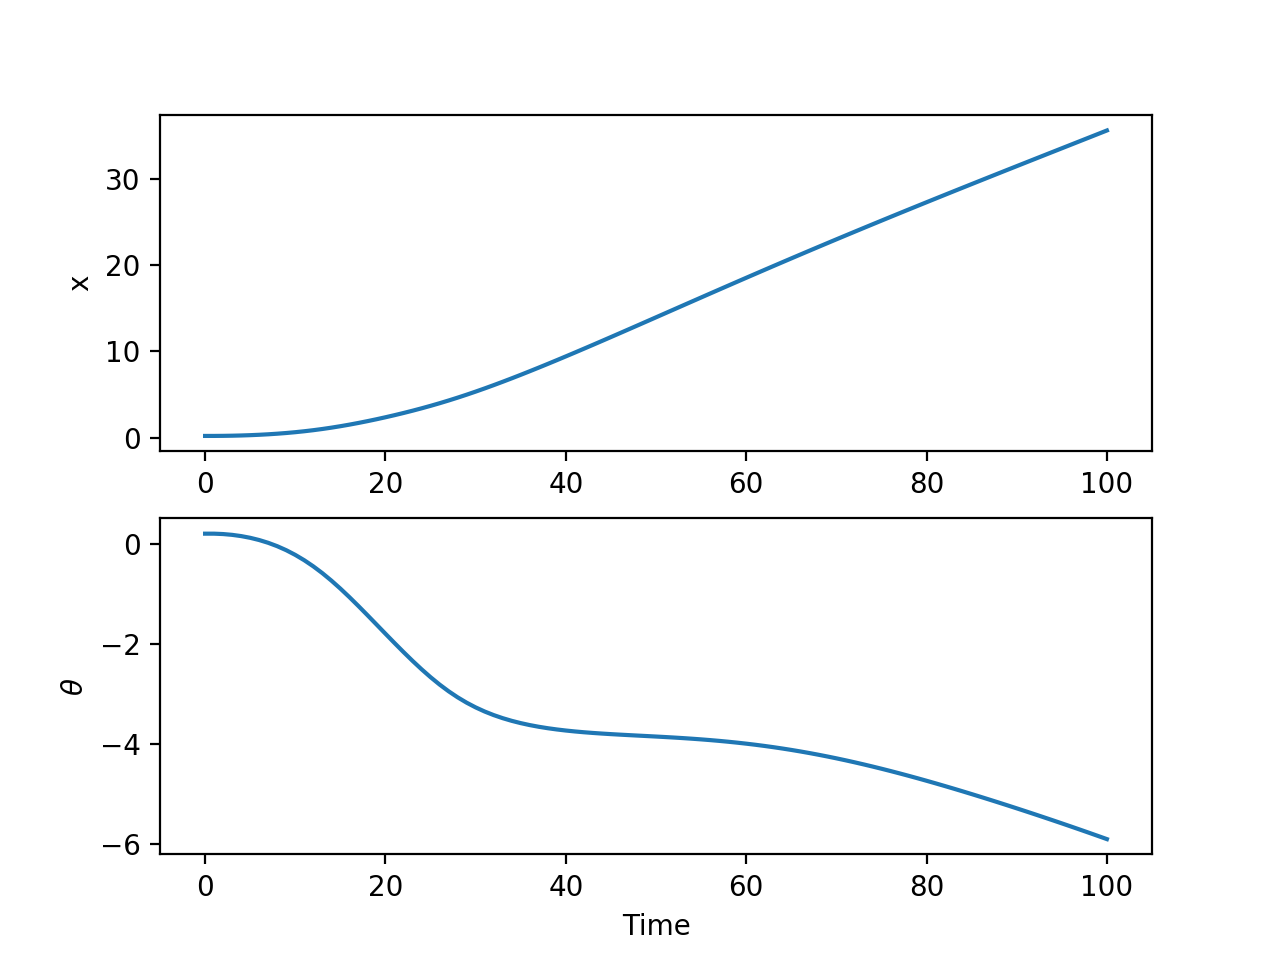

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAUv21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NyBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAskZYiE
ADv//vdOvwKbRZdqA5JXCvbKpCZZuVJrAfKmAAADAAADAAADAtr0eKCHw9Nt/MAiJ8LNRnZuk3xy
ASR30sn71Cu/yc7+rQ+zkVNFgBLn2tWYDQWF/yzW5Hkj/ByHlVfRJU+imQW/9Cdo+Kv/zN62I6gY
WMFPHbXUCe+TeUG+goxzSV+gXP3jLxeP4KbceycqX6o16Im8wY6jxKJBWoN+pFquML9uW9u5mMMA
O5SpgT2wlikWHzH8ekCKx6X35O9tfl6e86DMo1Mu0/F1nUJPw9F3DHTcZJhnwfQcxfd3U7WRTzy6
falxPOg+6tYM4CQkN7oFlz8qk14BB/SF7AB2yTNANgXCM9E/88KpDImor5YFMmXHVYhuun9nPzjN
yasjKAmGISoyx7hJjng5m++B89TF4igHbPwzNeya+vgGmAY3MN/VLAtTybOex9LlvzW5dfVitC6q
egoGRZfd8M56Y4tGciLTV0X9iqJr8IEnOKPXlwDXzAqV7lFXSlj4j7fBuZPQgo3P5C9WfZfZutmB
wV03PXscbl2EXlfiS9vsQqwOnAa5RaSx1fKAtAJEbKBCBbY7zDD0iTAT/sjZ0c5sy5+xV50gLsbR
SSJ1+X9UGhrvNHj75rXicouvxUpgSt/O3R79dSntetakZTQfMrnsBIPZLeE3W9opgw97b7sYp3xb
ZY1Nu9XEssPR93GsHcIp9dku4nUZgom5BWuPm1a6L0UFhRKl1qWeGGyoW3uIkhdMe7jEPu6B9OtW
eHZjeMESmRcw9PIyuKOiWkPWK+UQYJz7koej1o4UT6iD+wA872d9Xyxllvkmlj5EykGaY1m1SMpE
FaH7Zr0usxrBD6U3/8QwE0jot2nV4E5aN/6M8GVWCt82nW8bqonJ+j4F+/7oqhkXhumbRme+xrD1
Y9m78SblTDxU5HlVw/Q9Kt8LsHwNXzqE9oco98o7rnPyq4H5NORUa8x70ZQczNL0fL60tsXwnQ+K
wkjzwfrCAQ1IR+skdnoOV1seffydpODn/qZKld3Wuir2U7Hjx1EkAAG2I5F6XYEt02jT7dJu3yCB
kujsaKn1VMFw8IhoC9ISb9NNXWX3V8LJqqtmxaXtPSmzVUPKpFNedw8p/0HyJ1S7js6cUqUdeDNZ
7bOt9q+yaYU0g44ezSx7m2ad4ibrpR5T+7yRIaccu021B9plWeZrBQwQlBKIsqNnCj6YvXYIxzEW
xkXsMU5WAAAajmPhmYDuZgjDwnV6vTd2b9+M3v+nnscF0tc5P+fAxUfhfDwN3+UX/nAQdr4Jr8fB
Zz9qP+gCFuBuT/HqjqS44cKSAGLUne3bQUq22JOr2dUAlOKe8Ewxpa6aW9V9l/FXbFez43XKRNv1
zPFjNs7Y/88+s9FWDNhaPHoozC8N8W2xSeSR1N7JlPKwGPa2/+5iZNa2YGquzPQJUelRo99D57v0
H/QALjpul5bxIlG9Edsnfq/p3HCT7jEWevS5lgEZ8hu0kEcJuyP5YPXoyysgec7GJn8SiUICoq0s
MDmXqPDYeEDP+9RJt8ru4kT8i3jaXVrp6EfKqbycnAew/OVwolpzCyCqx86oA+A4/ZLhnawy85MY
1bgwRC4+6/XzF423QdCL9yUOvpnYjZqhoIsn+igIBoFHn6VPlp0GSOxnCzv+MkGk1kPeHJB+C+Qk
wur4kaxbdRBhXxwPI8vSJfHKV1kIitGN6n+ocd6U5kKz3YcYd3Tty2ZYFRn06SmPMO8v7wH4HfSR
jOo3kQE2ZQOqrRvxmOZYckbdi9F1O5DV+h0Sj0cnJUKaY++KvpdRTAa56awjnK+lsS3aRKrmxFk1
b+3O9jdLHiMltxjzFnzvSnvXhSqZRztC0rsZ7vXN0buYc1lq4J3KU1hY7TmHc2rRKGnMYnroiCaC
912LsoStVq0x8Gdwo8RGq1L3CEFwtmG4knSliP21KMHc1VuAt/skVTMuM4k4OUm2KD7q/GrVPGTp
K50+8yAqOQ4pp1yilSfy8ozZN6+4lQf+i8eYnEGYtnykFUBSukU9D26xi73LIGCZvsyeNPTQ1UsW
r8y+v9EYQg4HSGfDFPY8/Ora6/0qFMUY0mmbGs6HeYjtuhFA5El88+8tNHr1Xu9MM8hsQVixDg0B
nXHh3xnKbdEKiA4LiNYljISVWxFK5hk60KeFQTOvF0e9mMYGrazW/4eH4edTi3RAt9qiLms1kkT3
2QJULCGiSRsNEsxBIHxMCfDkRaM0xGWBozVsbSxHB33xoiLz1DC2Va6At/6COphMVQ4TW3VwCn8a
cEN5qY1n1ZF4YSyC7FRkpBGr7UIcc+pH6H99GcFwp286oFNFRENvusoVqP0EPsWa2M1V9Zg3mh3B
Xh6N8YpEvS976tvtTWCZth6ZHmjI675j3DNrHwC4b3P/lPk/YyM/4H03EguPI8m/CEez5p2m2EL+
abireOJ7+E+/Slkm6sUUdl7eqaNp6OPUbhtAZiMEF8ABjPYzl+0Kd7CEu1U7i5cd2T0Jyri1K6Ph
vEIL6Vp2WalMyv8xIWVFkuRpe8+lPOjdAlF2hRVH/SFpurmZ2SxPxkfS96UXvGOrc/cfiQqSncKc
tl/65TAJASnFPxVWpq+NzrbDftnGJfG8rWKovNOVmfQSbUQlnMBTWnOwV6f2Z5KNKgY5bpNmQ1l4
seuYswiK72YdsK+Jgvr/VfKzauVtoR5tK0ai5gCN8PuM8DYUpKSZ49uv3M1yakus1zlb4gpip0gt
qNU/3INwuEDRCkSXsxmwlZPcvKS/nNHbcubW4RSDrZKj2HocreHsVrEsrLw6qa02+KFZ1friFmqR
t/7DwV473ftQvXdiaWrCRXFd4XhbxE8FCG5Iv7Lz7Go5NQeQLTxoNn147FS8VLR3MvKB3EbxBI0K
tz+ArTBITxDZ+/BEjYxGh

In [27]:
#Q3 the system diverges if we start it far from the linearized state!
horizon_length=100
Q=10*np.eye(4)
R=0.1*np.eye(1)
x0_2=np.array([0.2,0.1,0.2,0.])
P,K=solve_ricatti_equations(A, B, Q, R, horizon_length)

uff = []
for i in range(horizon_length):
    uff.append(-K[i].dot(np.array([0.,0.,np.pi,0.])))

X_2,u_2 = simulate_cart_pole(x0_2, K, uff, horizon_length, mp=1., mc=5., l=1., g=9.81)


plt.figure()
plt.subplot(2,1,1)
plt.plot(X_2[0,:])
plt.ylabel('x')
plt.subplot(2,1,2)
plt.plot(X_2[2,:])
plt.ylabel(r'$\theta$')
plt.xlabel('Time')
animate_cart_pole(X_2)